In [1]:
import tensorflow as tf
from models import MyPerceptronKeras

In [2]:
model = MyPerceptronKeras()

In [49]:
x = tf.constant([1.0, 2.0])
xs = tf.constant([[1.0, 3.0], [5.0, 4.0]])
xs.shape
# w = tf.constant([3.0, 3.0])

TensorShape([2, 2])

In [25]:
y_predicted = model(xs)
y_predicted

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1., -2.], dtype=float32)>

In [26]:
y_true = tf.constant([-1.0, 1.0])
y_true.shape

TensorShape([2])

In [27]:
def loss(y_predicted, y_true):
    return tf.reduce_sum(tf.maximum(tf.zeros(y_true.shape), -y_true*y_predicted))
    

In [28]:
loss(y_predicted, y_true)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [3]:
import json

In [4]:
with open('../synthetic_data/train.json') as f:
    d = json.load(f)

In [5]:
xs = d['user_data']['0']['x']
ys = d['user_data']['0']['y']

In [6]:
tf_d = tf.data.Dataset.from_tensor_slices((xs, ys))

In [7]:
for batch in tf_d.shuffle(100).batch(5).take(3):
    print(type(batch))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [151]:
lr = 0.02

In [152]:
loss_history = []

In [154]:
for _ in range(10):
    loss_val = tf.Variable(0.0)
    count = 0
    for batch in tf_d.batch(5):
        lr -= 0.001
        y_predicted = model(batch[0])
        y_true = batch[1]
        loss_val.assign_add(loss(y_predicted, y_true)); count += 1
        toMul = y_true*tf.maximum(tf.zeros(y_true.shape), -y_true*y_predicted)
        grad_w_all = tf.transpose(tf.transpose(batch[0]) * toMul)
        grad_w = tf.reduce_sum(grad_w_all, 0)
        grad_b = tf.reduce_sum(toMul, 0)
        # print(grad_w, grad_b)    
        model.w.assign_sub(lr*grad_w)
        model.b.assign_sub(lr*grad_b)
    print("loss:", loss_val.numpy()/count)
    loss_history.append(loss_val/count)


loss: 2.9802322387695314e-09
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0


In [111]:
import matplotlib.pyplot as plt

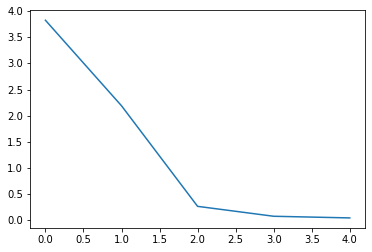

In [118]:
plt.plot(range(len(loss_history)), loss_history)

In [155]:
model.b.numpy(), model.w.numpy()

(-0.64796245, array([-0.08881515,  1.372045  ], dtype=float32))

In [138]:
model.b.numpy(), model.w.numpy()

(-0.634912, array([-0.19638506,  1.399368  ], dtype=float32))

In [156]:
tf.norm([-0.19638506,  1.399368  ])

<tf.Tensor: shape=(), dtype=float32, numpy=1.413081>

In [157]:
tf.norm([-0.08881515,  1.372045  ])

<tf.Tensor: shape=(), dtype=float32, numpy=1.3749166>